In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-games-dataset/games_dataset.csv


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_games = pd.read_csv('/kaggle/input/top-games-dataset/games_dataset.csv')

# Display the first few rows and the columns of the dataset
df_games.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476


In [5]:
df_games.shape

(5000, 5)

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB


In [7]:
df_games.describe(include='all')

,Game Name,Genre,Platform,Release Year,User Rating
count,5000,5000,5000,5000.000000,5000.000000
unique,58,14,5,NaN,NaN
top,The Legend of Zelda: Breath of the Wild,Sports,PC,NaN,NaN
freq,108,403,1056,NaN,NaN
mean,NaN,NaN,NaN,2011.375400,5.524913
std,NaN,NaN,NaN,6.943984,2.598429
min,NaN,NaN,NaN,2000.000000,1.005878
25%,NaN,NaN,NaN,2005.000000,3.260596
50%,NaN,NaN,NaN,2011.000000,5.574233
75%,NaN,NaN,NaN,2017.000000,7.802727


In [8]:
df_games.isnull().sum()


Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64

In [10]:
df_games_clean = df_games.dropna()
df_games_clean['Release Year'] = df_games_clean['Release Year'].astype(int)


In [11]:
# Check data types
df_games_clean.dtypes


Game Name        object
Genre            object
Platform         object
Release Year      int64
User Rating     float64
dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


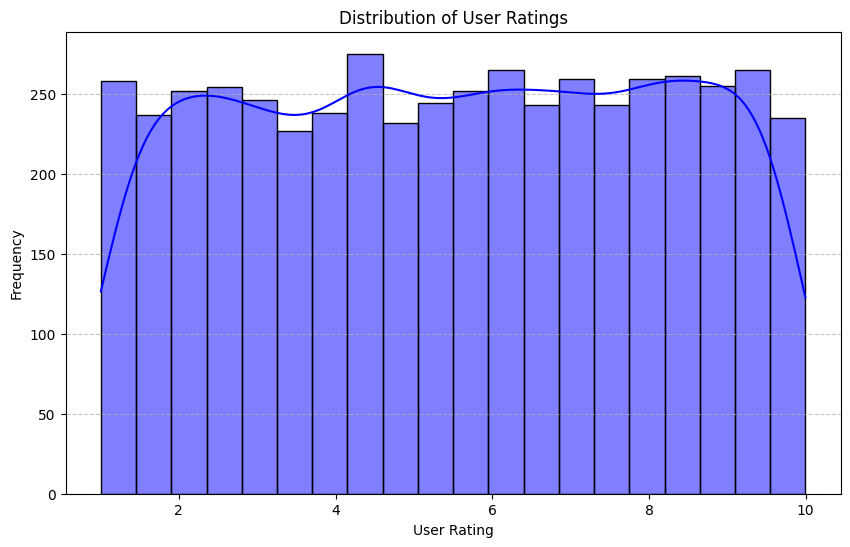

In [12]:
# Plot the distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_games_clean['User Rating'], bins=20, color='blue', edgecolor='black', kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

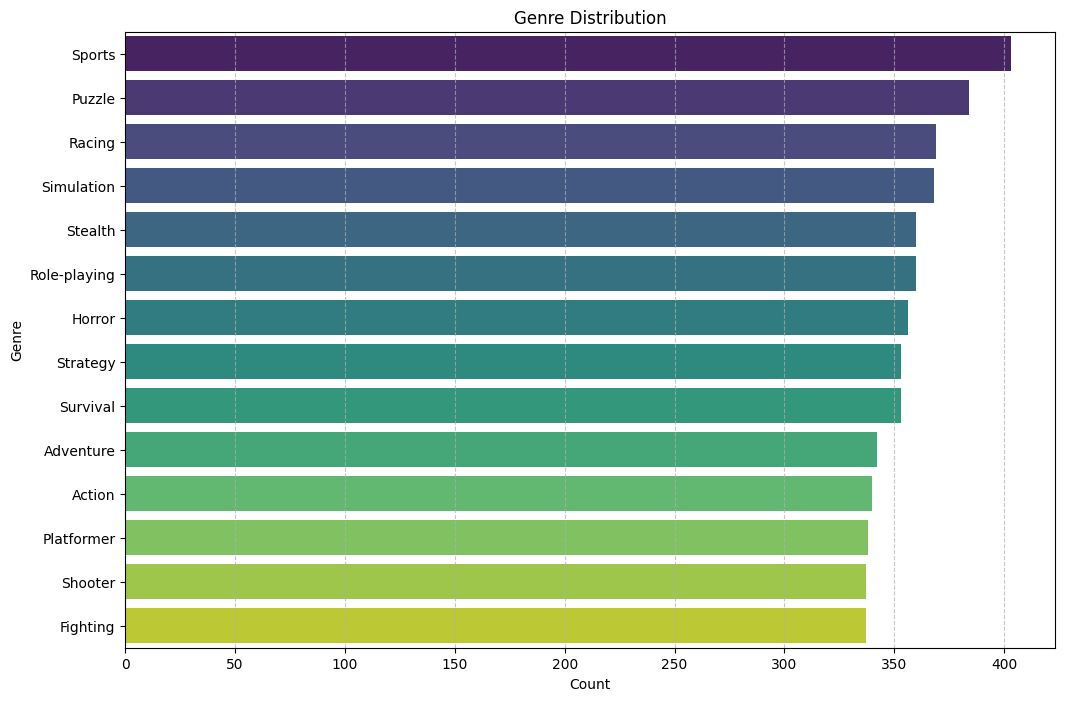

In [13]:
# Plot the distribution of genres
plt.figure(figsize=(12, 8))
sns.countplot(data=df_games_clean, y='Genre', order=df_games_clean['Genre'].value_counts().index, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

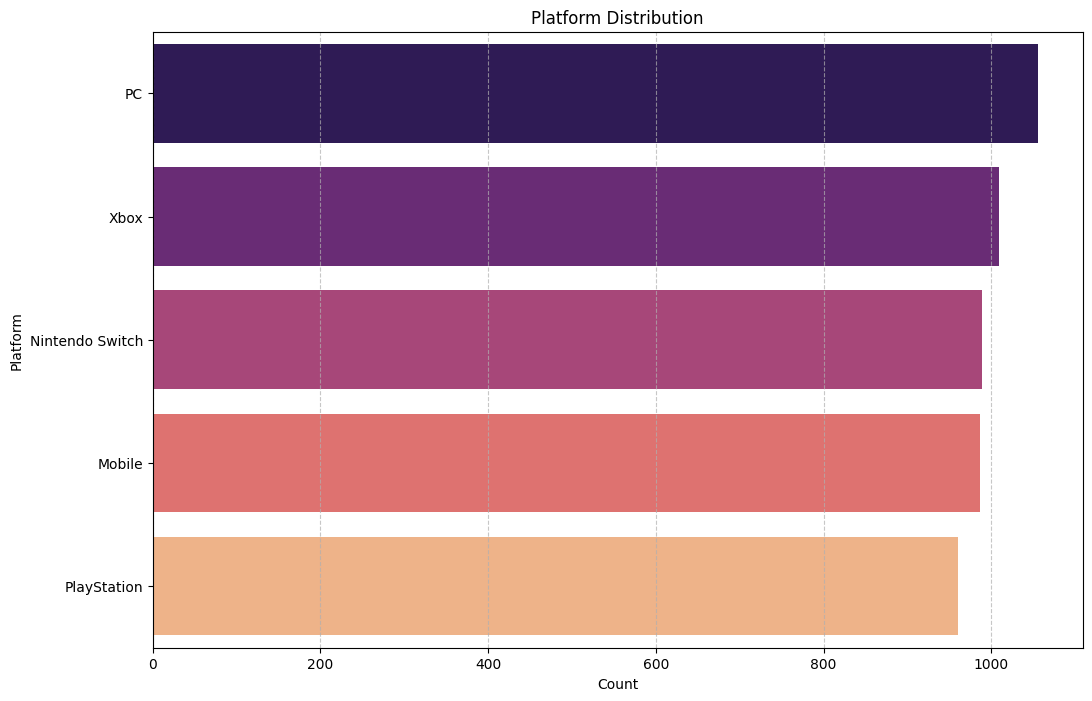

In [14]:
# Plot the distribution of platforms
plt.figure(figsize=(12, 8))
sns.countplot(data=df_games_clean, y='Platform', order=df_games_clean['Platform'].value_counts().index, palette='magma')
plt.title('Platform Distribution')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


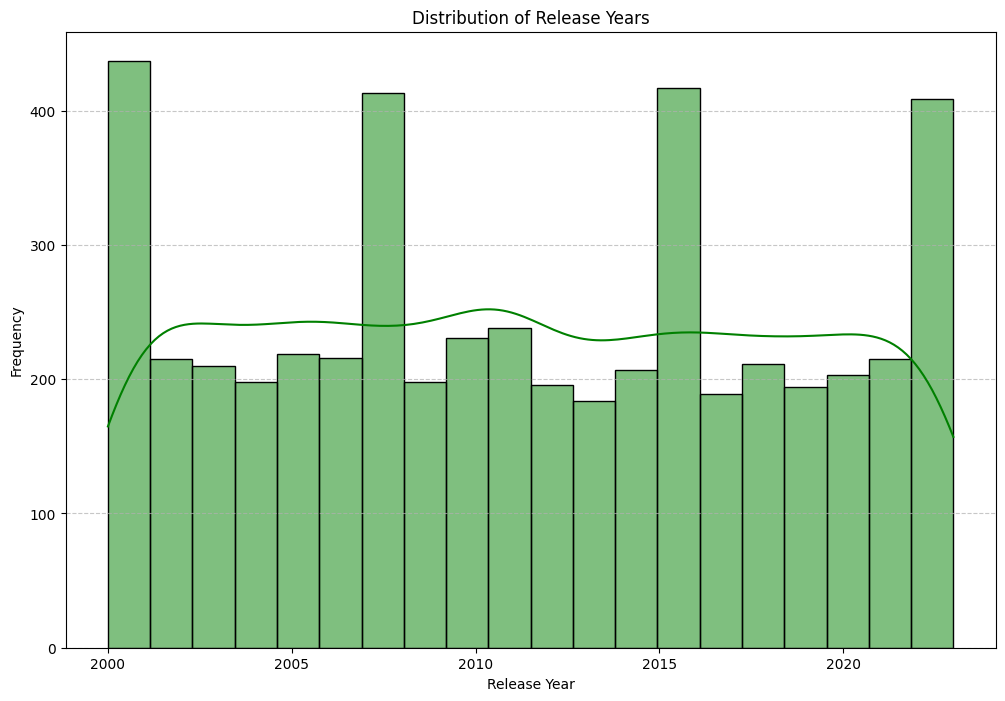

In [15]:
# Plot the distribution of release years
plt.figure(figsize=(12, 8))
sns.histplot(df_games_clean['Release Year'], bins=20, color='green', edgecolor='black', kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

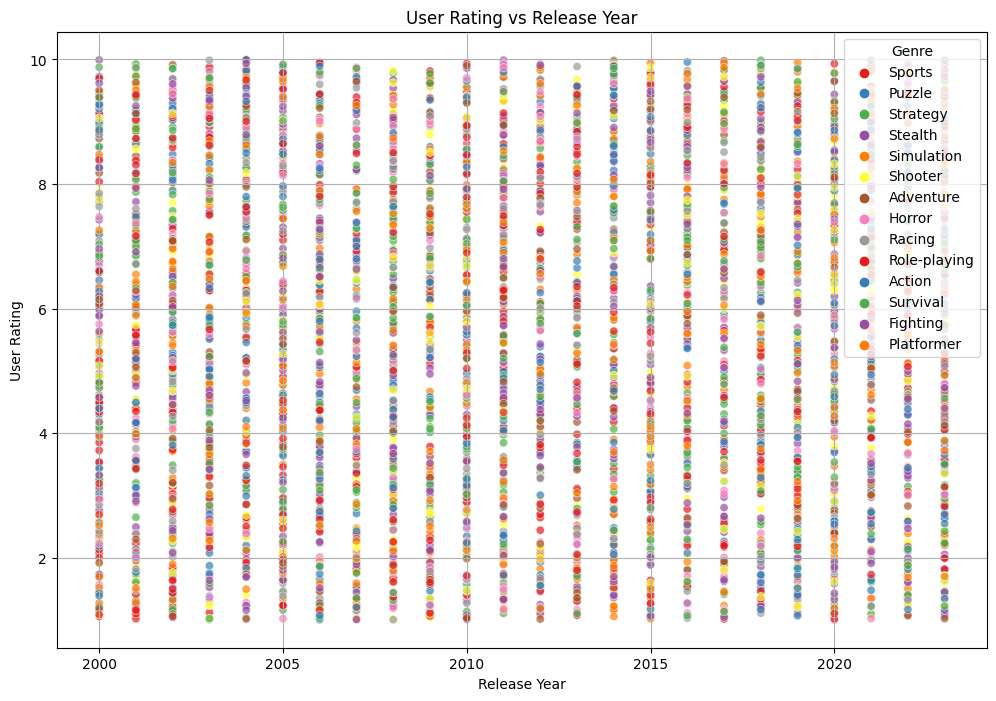

In [16]:
# Scatter plot of User Rating vs Release Year
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_games_clean, x='Release Year', y='User Rating', hue='Genre', palette='Set1', alpha=0.7)
plt.title('User Rating vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.grid(True)
plt.show()

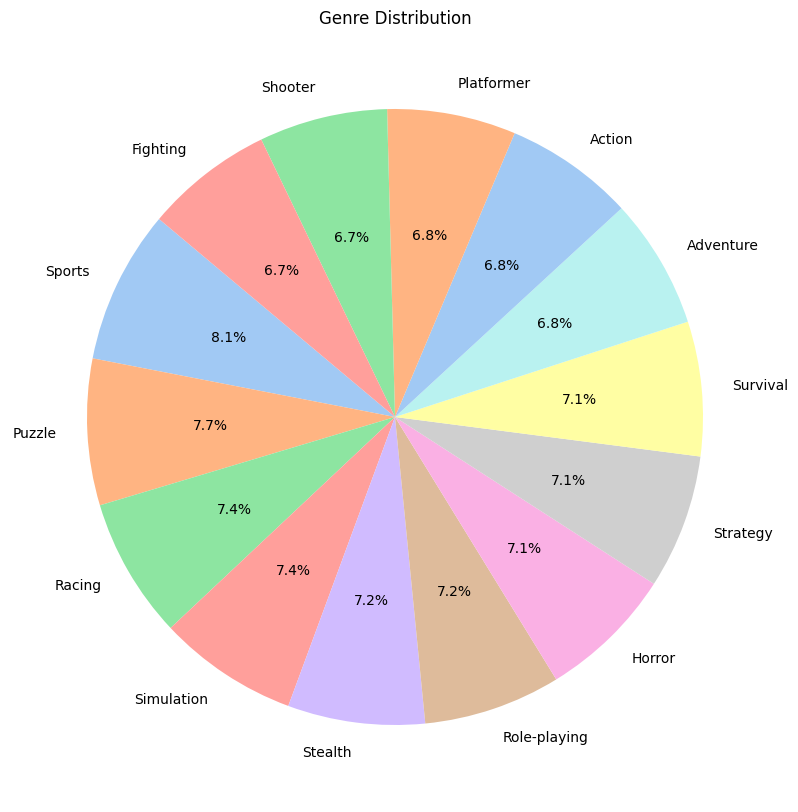

In [17]:
# Pie chart of Genre Distribution
plt.figure(figsize=(10, 10))
genre_counts = df_games_clean['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Genre Distribution')
plt.show()

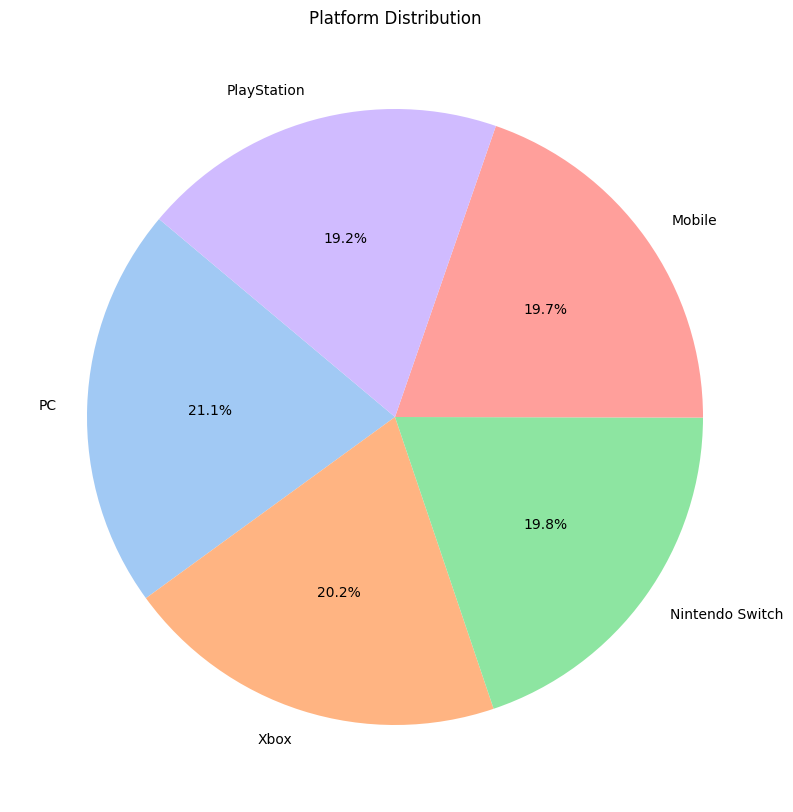

In [18]:
# Pie chart of Platform Distribution
plt.figure(figsize=(10, 10))
platform_counts = df_games_clean['Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Platform Distribution')
plt.show()

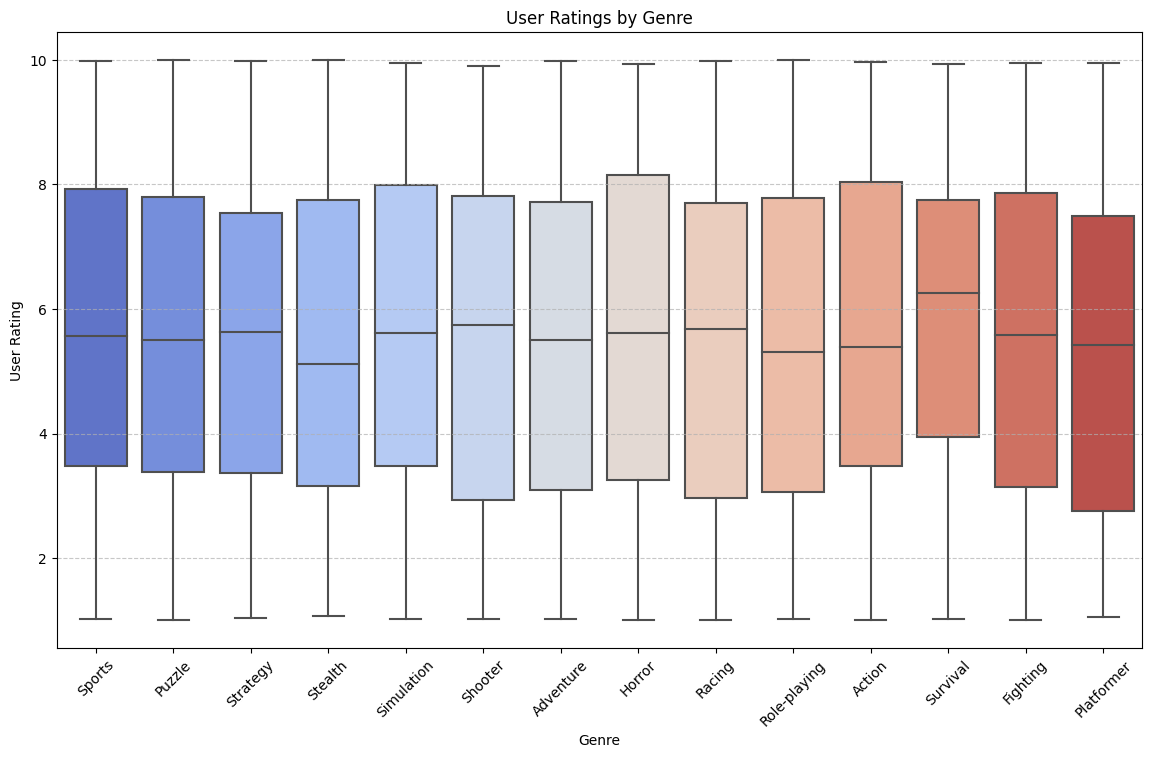

In [19]:
# Boxplot of User Ratings by Genre
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_games_clean, x='Genre', y='User Rating', palette='coolwarm')
plt.title('User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

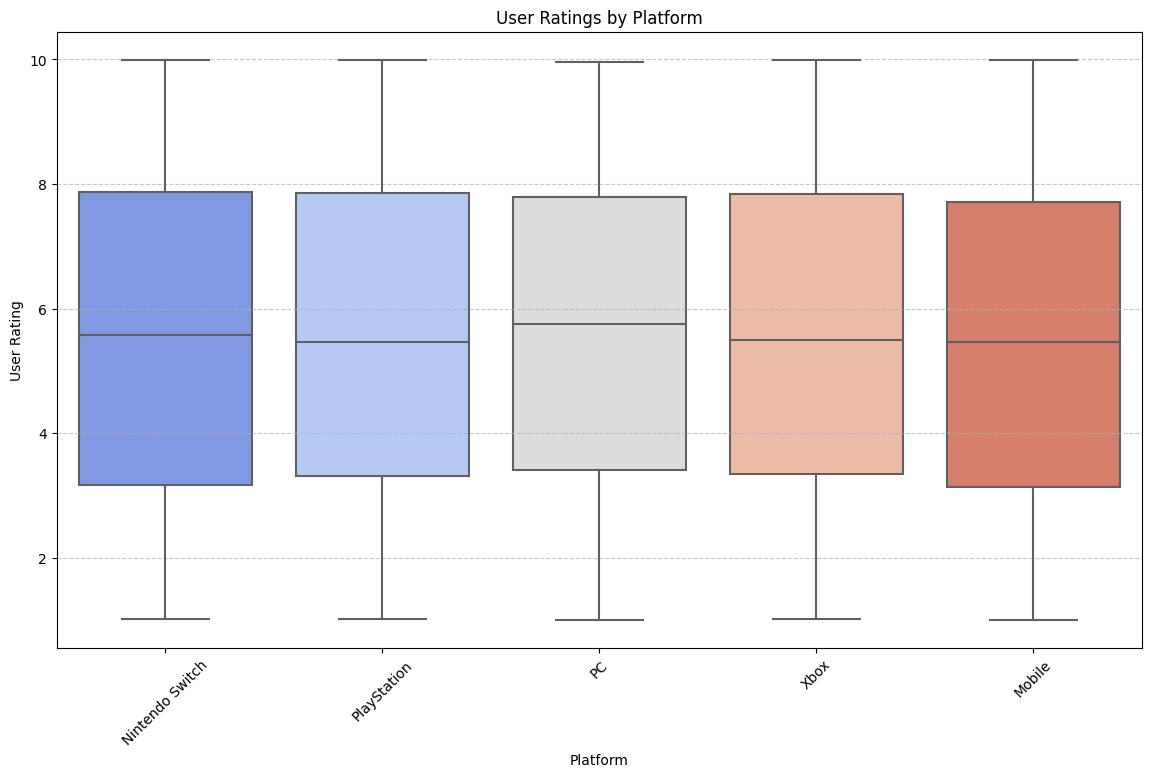

In [20]:
# Boxplot of User Ratings by Platform
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_games_clean, x='Platform', y='User Rating', palette='coolwarm')
plt.title('User Ratings by Platform')
plt.xlabel('Platform')
plt.ylabel('User Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

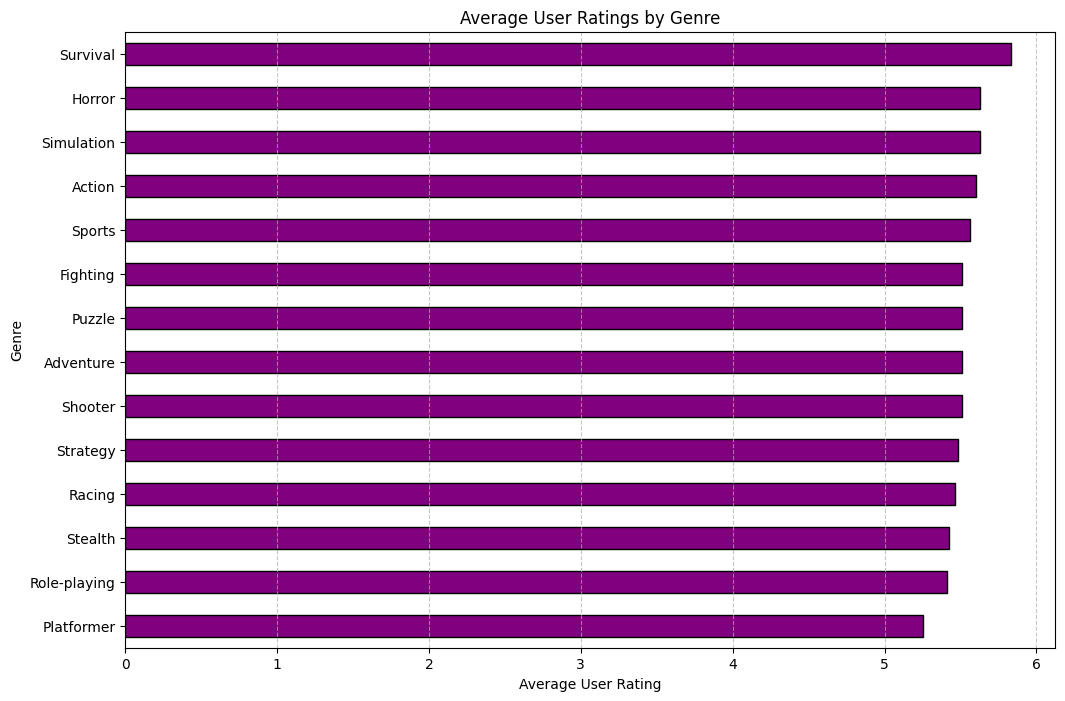

In [21]:
# Calculate average user rating by genre
avg_rating_by_genre = df_games_clean.groupby('Genre')['User Rating'].mean().sort_values()

# Plot average user ratings by genre
plt.figure(figsize=(12, 8))
avg_rating_by_genre.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Average User Ratings by Genre')
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

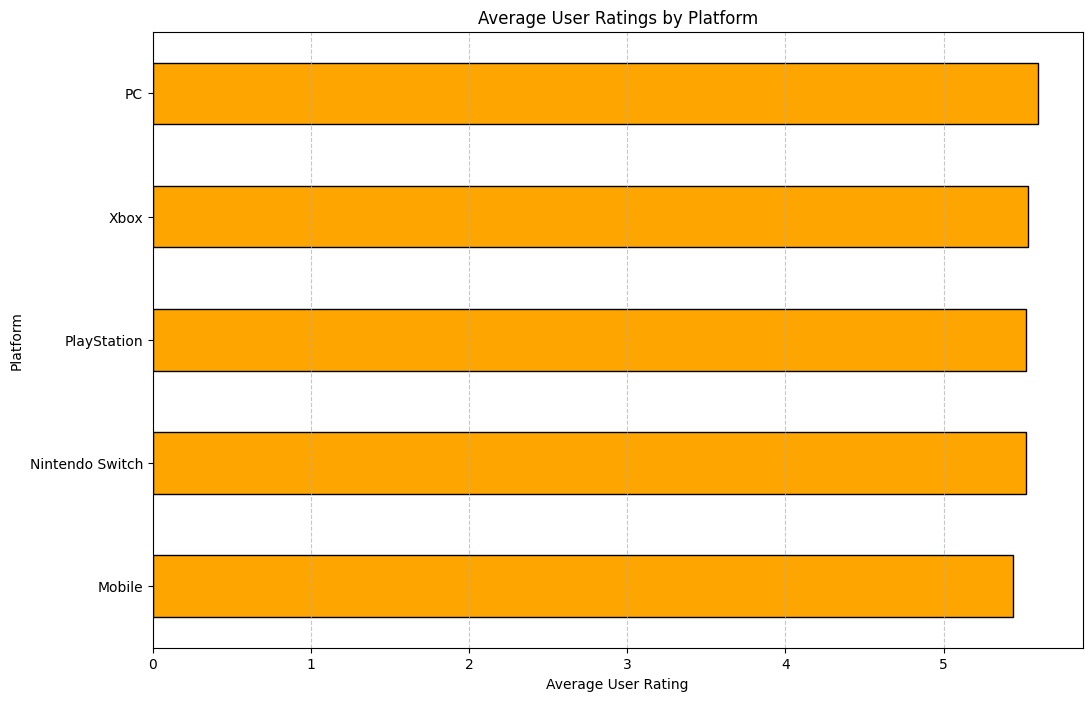

In [22]:
# Calculate average user rating by platform
avg_rating_by_platform = df_games_clean.groupby('Platform')['User Rating'].mean().sort_values()

# Plot average user ratings by platform
plt.figure(figsize=(12, 8))
avg_rating_by_platform.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Average User Ratings by Platform')
plt.xlabel('Average User Rating')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

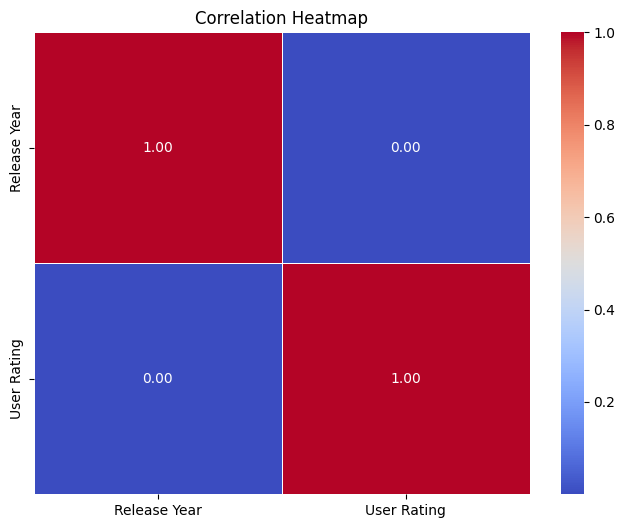

In [23]:
# Compute correlation matrix
corr_matrix = df_games_clean[['Release Year', 'User Rating']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

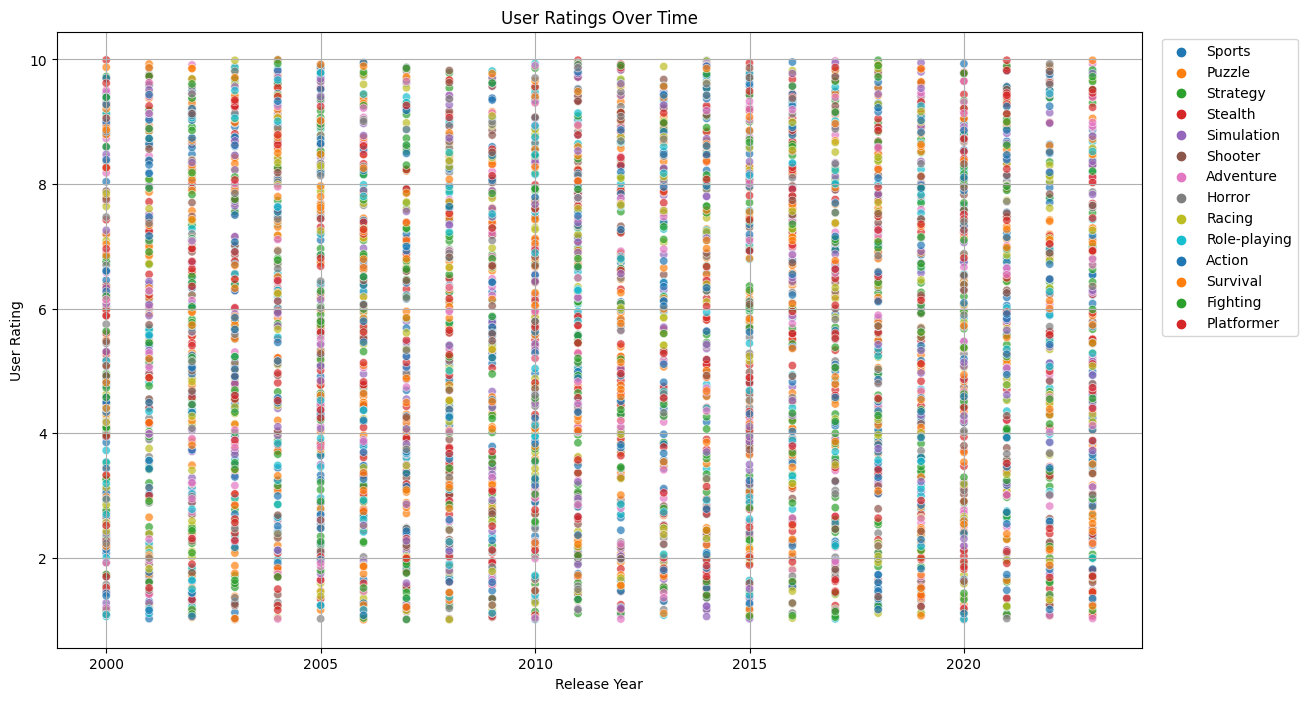

In [24]:
# Plot user ratings over time (by Release Year)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_games_clean, x='Release Year', y='User Rating', hue='Genre', palette='tab10', alpha=0.7)
plt.title('User Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()

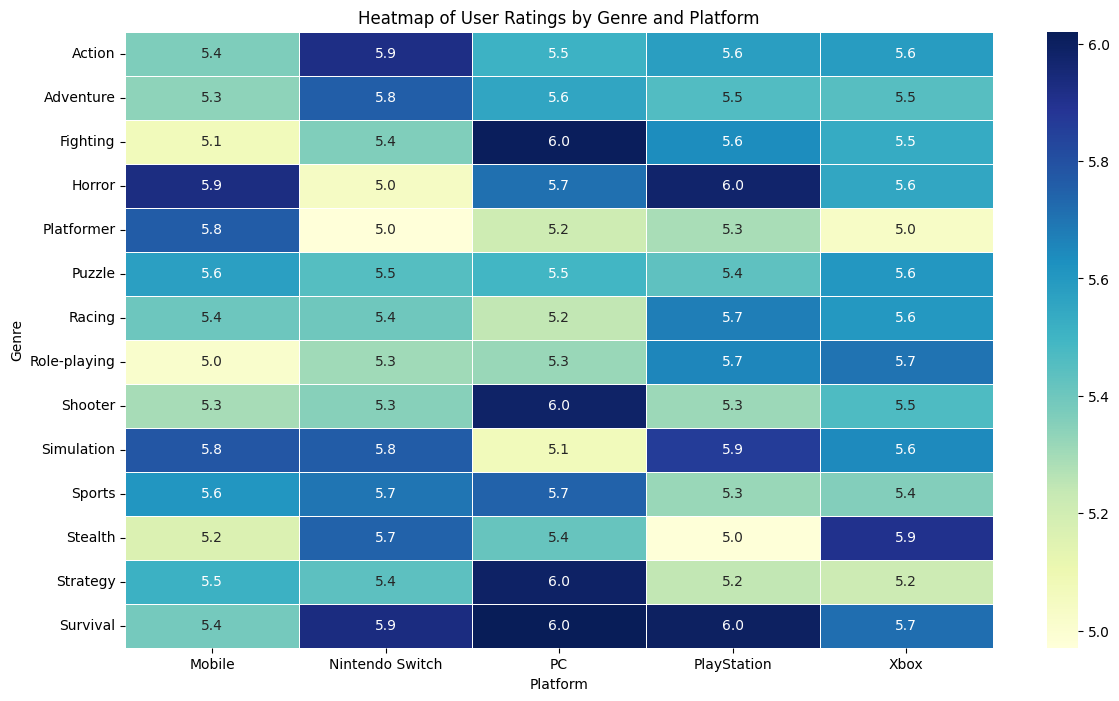

In [25]:
# Pivot table for heatmap
pivot_table = df_games_clean.pivot_table(values='User Rating', index='Genre', columns='Platform', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Heatmap of User Ratings by Genre and Platform')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.show()

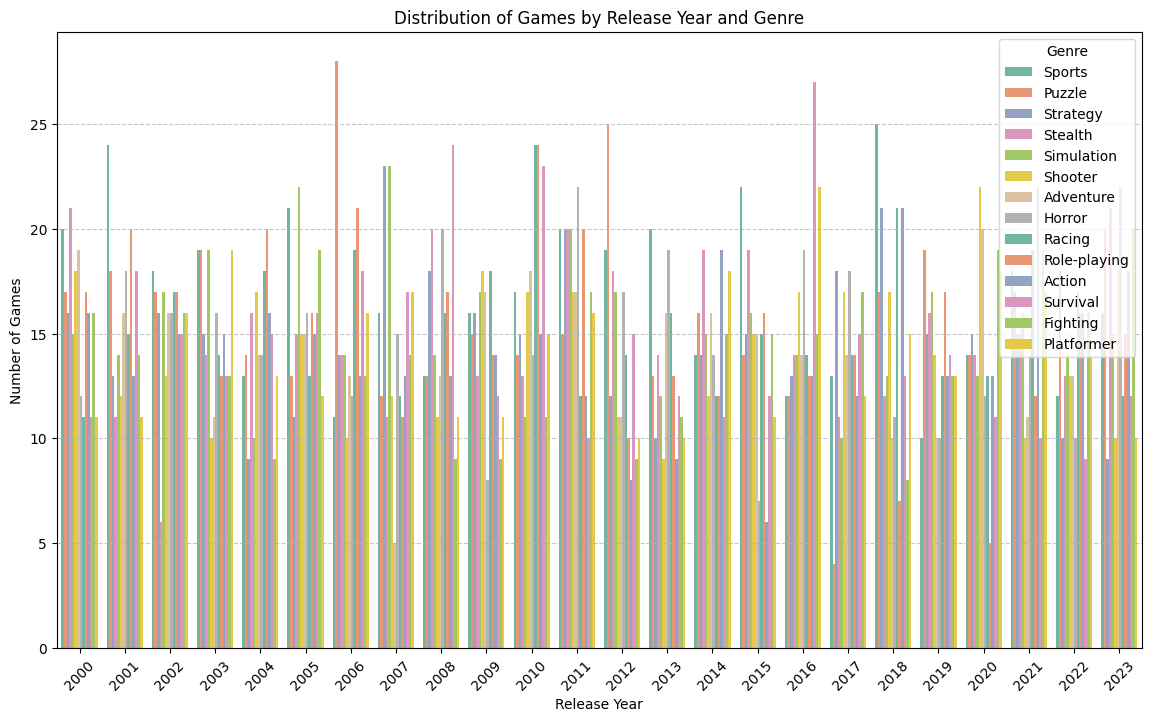

In [26]:
# Plot the count of games by Release Year and Genre
plt.figure(figsize=(14, 8))
sns.countplot(data=df_games_clean, x='Release Year', hue='Genre', palette='Set2')
plt.title('Distribution of Games by Release Year and Genre')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

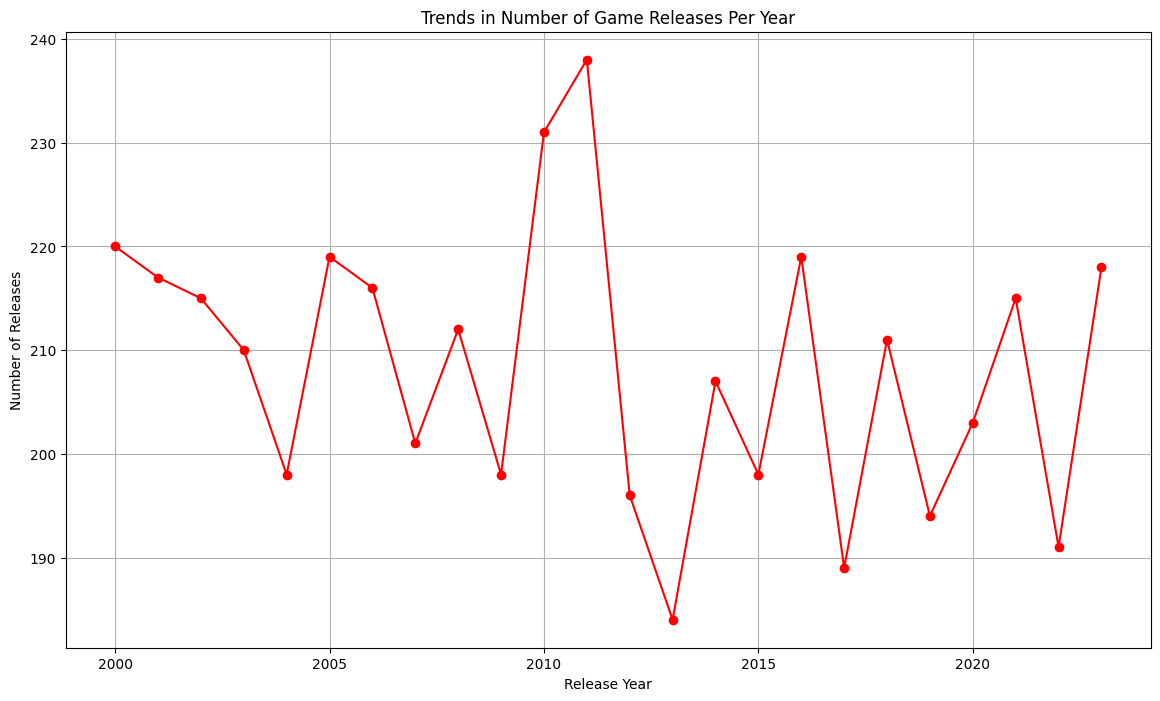

In [27]:
# Plot trends in the number of releases per year
plt.figure(figsize=(14, 8))
release_year_trends = df_games_clean['Release Year'].value_counts().sort_index()
release_year_trends.plot(kind='line', marker='o', color='red')
plt.title('Trends in Number of Game Releases Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

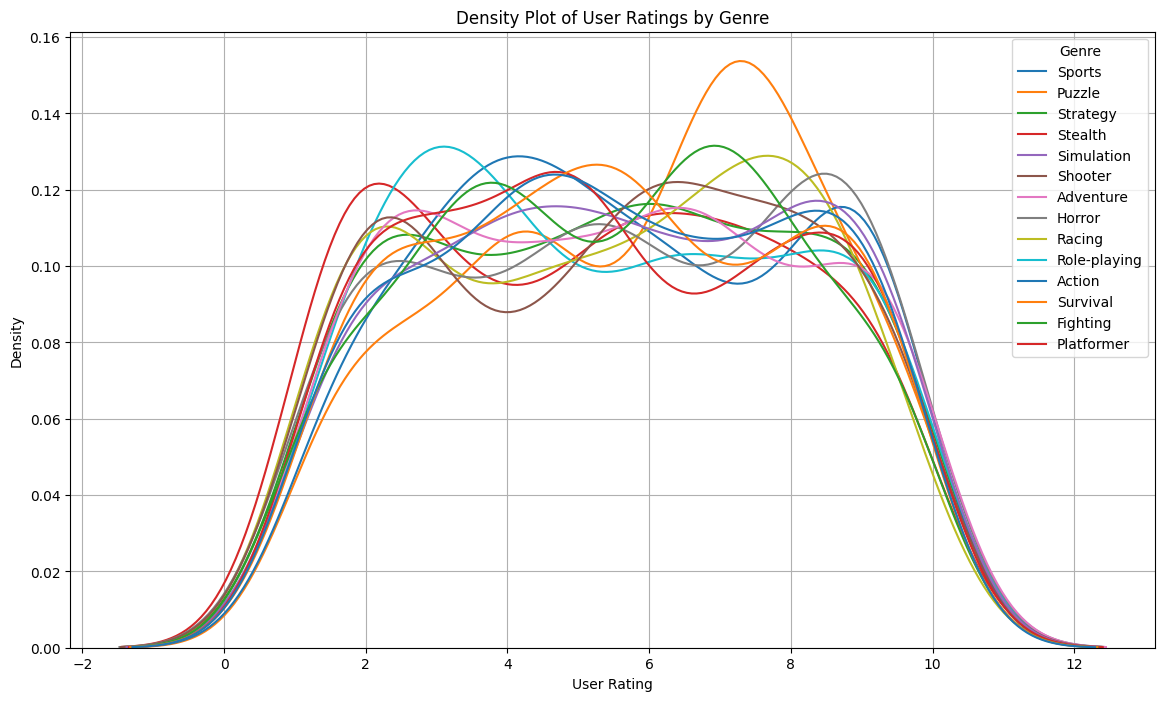

In [28]:
# Kernel Density Estimate (KDE) plot of user ratings by genre
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df_games_clean, x='User Rating', hue='Genre', common_norm=False, palette='tab10')
plt.title('Density Plot of User Ratings by Genre')
plt.xlabel('User Rating')
plt.ylabel('Density')
plt.grid(True)
plt.show()

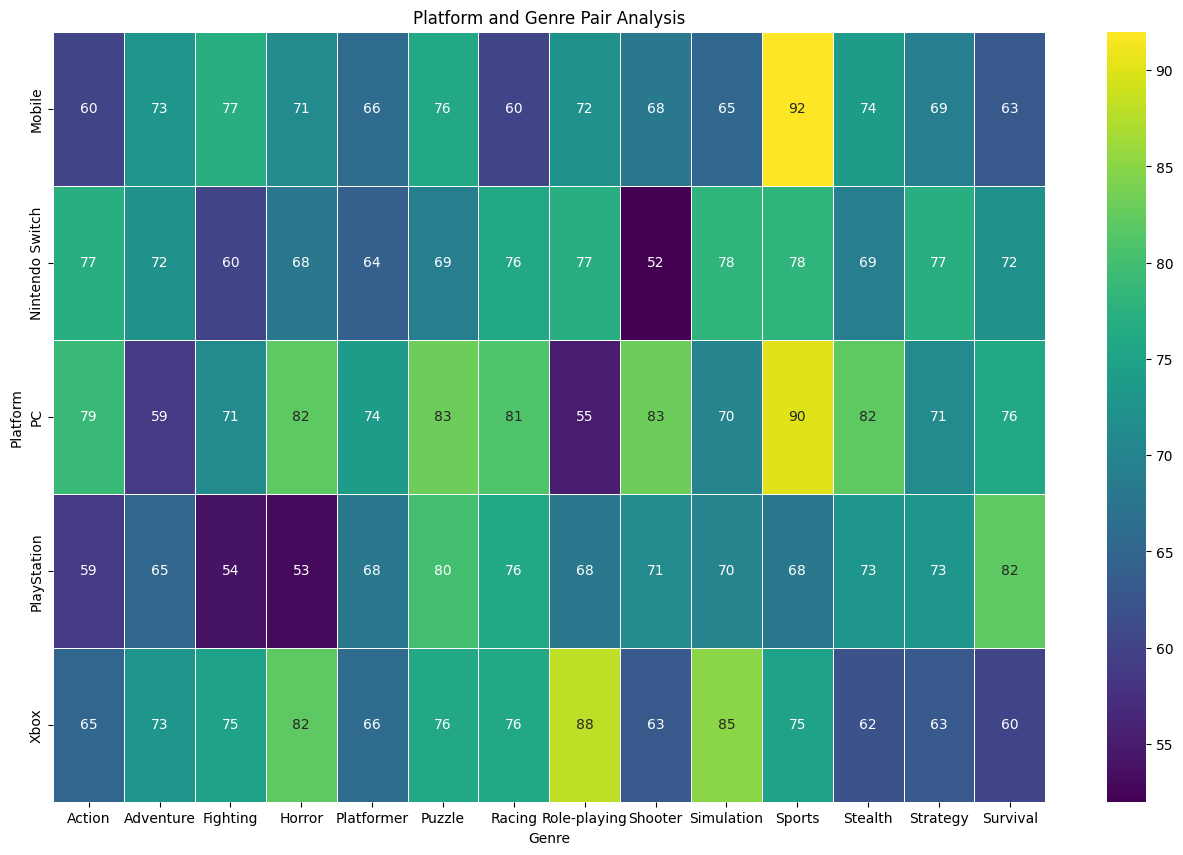

In [29]:
# Create a DataFrame for analysis of platform and genre pairs
platform_genre_counts = df_games_clean.groupby(['Platform', 'Genre']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(16, 10))
sns.heatmap(platform_genre_counts, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title('Platform and Genre Pair Analysis')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.show()

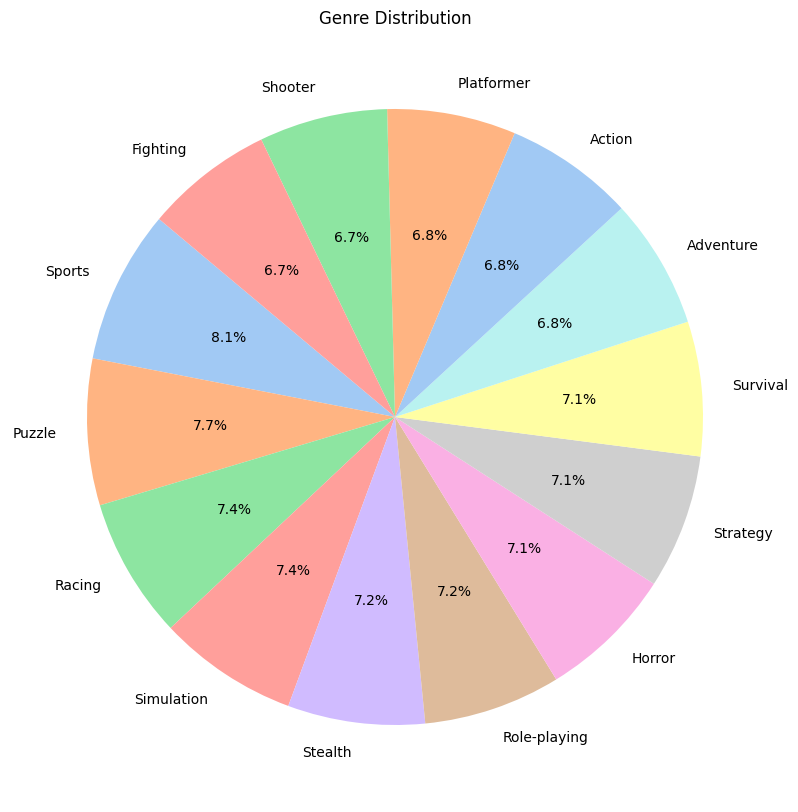

In [30]:
# Pie chart of Genre Distribution
plt.figure(figsize=(10, 10))
genre_counts = df_games_clean['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Genre Distribution')
plt.show()

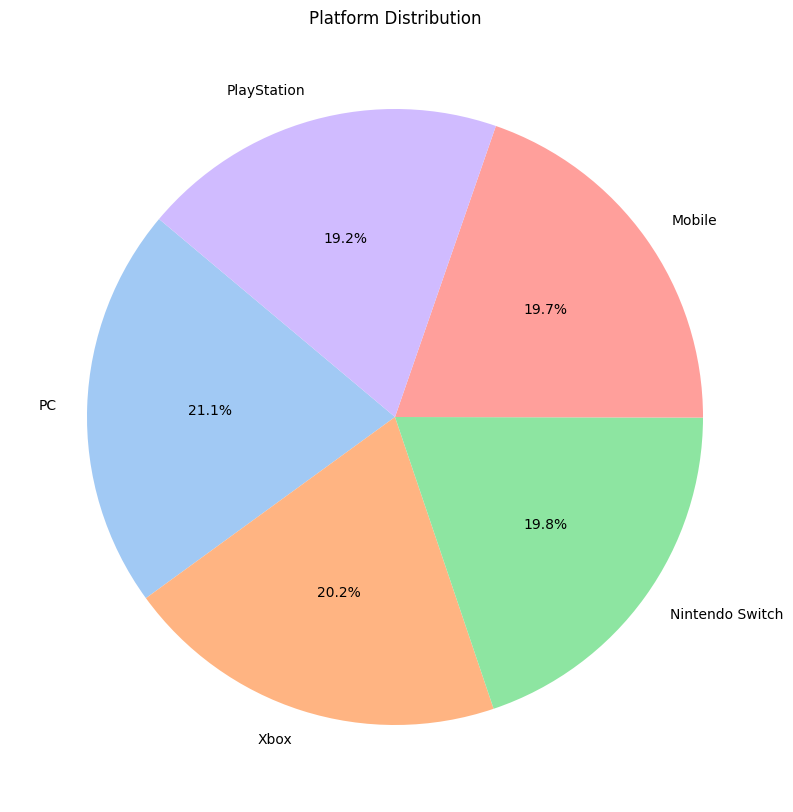

In [31]:
# Pie chart of Platform Distribution
plt.figure(figsize=(10, 10))
platform_counts = df_games_clean['Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Platform Distribution')
plt.show()

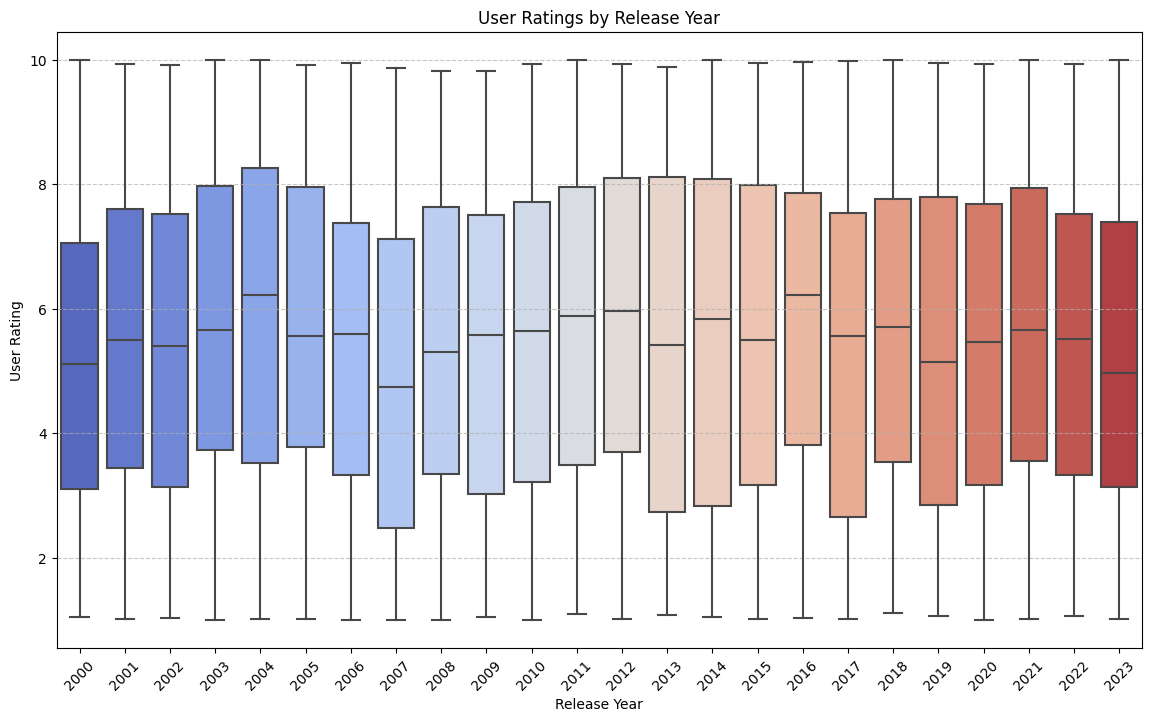

In [32]:
# Box plot of user ratings by release year
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_games_clean, x='Release Year', y='User Rating', palette='coolwarm')
plt.title('User Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

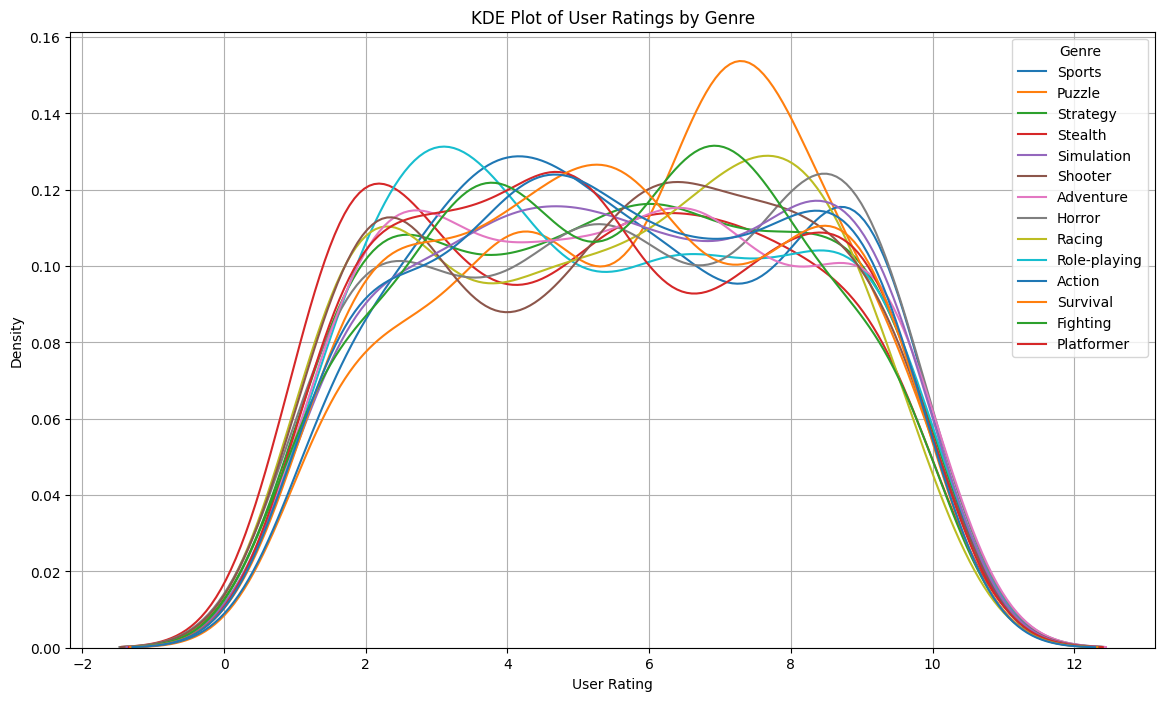

In [33]:
# KDE plot of User Ratings by Genre
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df_games_clean, x='User Rating', hue='Genre', common_norm=False, palette='tab10')
plt.title('KDE Plot of User Ratings by Genre')
plt.xlabel('User Rating')
plt.ylabel('Density')
plt.grid(True)
plt.show()

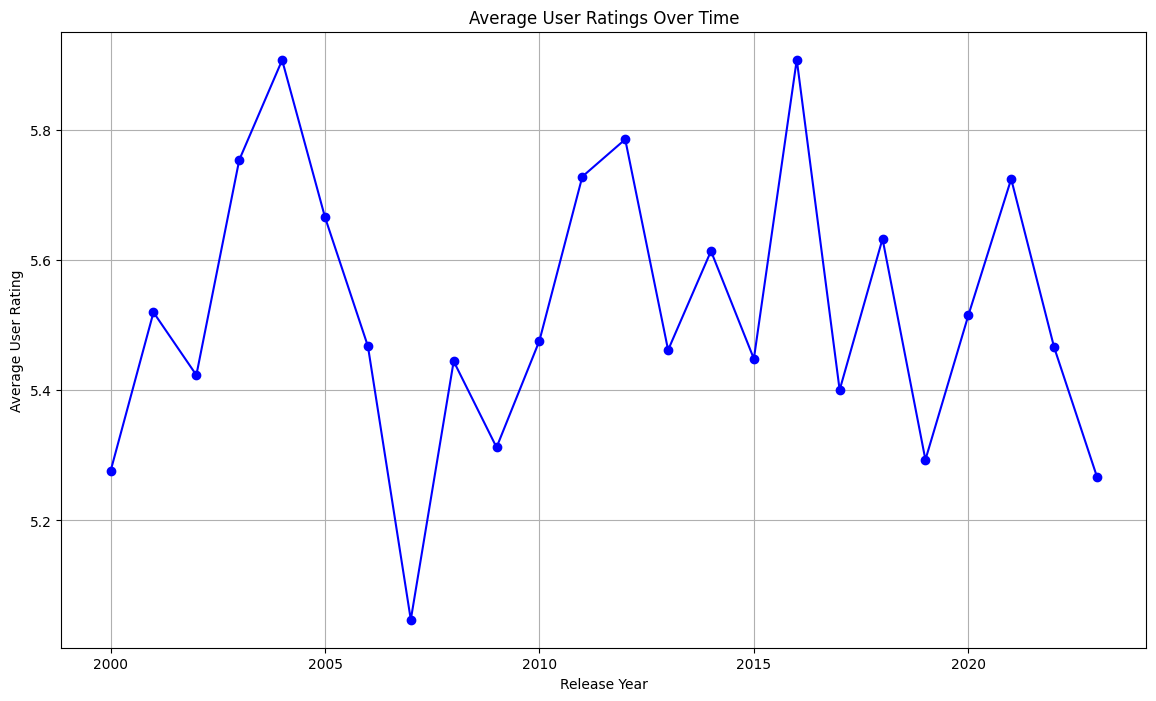

In [34]:
# Line plot of average user ratings over time (by Release Year)
plt.figure(figsize=(14, 8))
avg_rating_over_time = df_games_clean.groupby('Release Year')['User Rating'].mean()
avg_rating_over_time.plot(kind='line', marker='o', color='blue')
plt.title('Average User Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average User Rating')
plt.grid(True)
plt.show()